In [20]:
import pickle
import pandas as pd
import matplotlib.pyplot as pl

In [21]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def load_pickle_to_dataframe(file_path):
    """
    Load a pickle file into a pandas DataFrame and print the DataFrame along with its type and shape.

    Parameters:
    file_path (str): The path to the pickle file.

    Returns:
    pd.DataFrame: The loaded DataFrame.
    """
    with open(file_path, 'rb') as f:
        data = pickle.load(f)

    # 데이터 구조 확인
    print("Data type:", type(data))

    # 데이터프레임 변환
    if isinstance(data, dict):
        df = pd.DataFrame.from_dict(data, orient='index').reset_index()
        df.columns = ['Index', 'Values']
    else:
        raise ValueError("Unsupported data type")

    # 데이터프레임 출력
    print(df)
    print("\nDataFrame type:", type(df))
    print("DataFrame shape:", df.shape)
    return df

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
path = '/content/drive/MyDrive/image_caption/loss/image_captioning_model.pkl'
loss = load_pickle_to_dataframe(path)

Data type: <class 'dict'>
                Index                                             Values
0          best_epoch                                                 50
1       best_val_bleu                                           0.054862
2  train_loss_history  [7.490090557098389, 5.41044263458252, 5.261413...
3    val_loss_history  [5.571892337799072, 5.220168151855469, 5.13324...
4   val_score_history  {'bleu2': [3.383277918010649e-155, 3.970031148...

DataFrame type: <class 'pandas.core.frame.DataFrame'>
DataFrame shape: (5, 2)


In [23]:
def plot_loss_history(df):
    """
    Plot the train and validation loss history from a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing loss history.
    """
    # 필요한 데이터 추출
    train_loss_history = df.loc[df['Index'] == 'train_loss_history', 'Values'].values[0]
    val_loss_history = df.loc[df['Index'] == 'val_loss_history', 'Values'].values[0]

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Data type: <class 'dict'>
                Index                                             Values
0          best_epoch                                                 50
1       best_val_bleu                                           0.054862
2  train_loss_history  [7.490090557098389, 5.41044263458252, 5.261413...
3    val_loss_history  [5.571892337799072, 5.220168151855469, 5.13324...
4   val_score_history  {'bleu2': [3.383277918010649e-155, 3.970031148...

DataFrame type: <class 'pandas.core.frame.DataFrame'>
DataFrame shape: (5, 2)


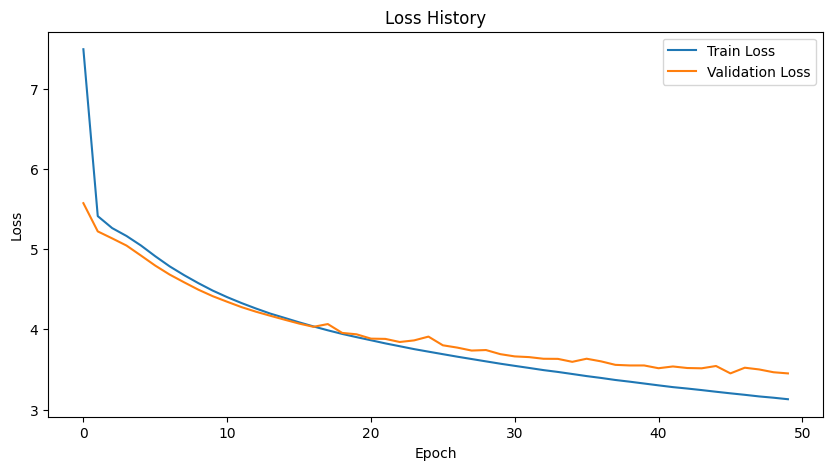

In [24]:
def main(file_path):
    """
    Main function to load pickle file, convert to DataFrame, and plot using matplotlib.

    Parameters:
    file_path (str): The path to the pickle file.
    """
    df = load_pickle_to_dataframe(file_path)
    plot_loss_history(df)

# 실행
path = '/content/drive/MyDrive/image_caption/loss/image_captioning_model.pkl'
main(path)